In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

IN THIS PROJECT , WE ARE GOING TO ANALYZE THE CRIMES IN LOS ANGELES.

In [3]:
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


WHAT IS THE  TIME MOSTLY , CRIME OCCURED?

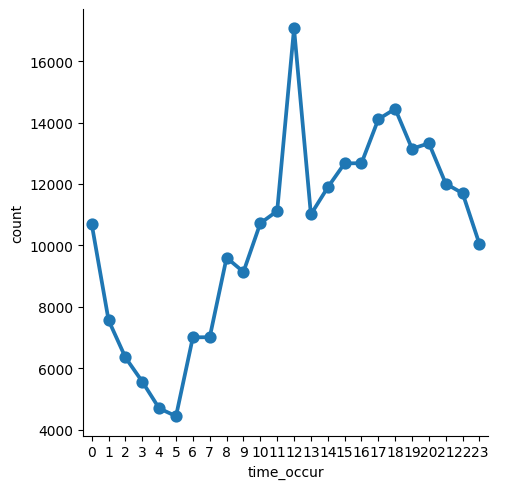

In [4]:
crimes['time_occur'] = crimes['TIME OCC'].str[:2].astype(int)
peak_crime_hou = crimes['time_occur'].value_counts()
peak_crime_hour = pd.DataFrame(peak_crime_hou)
sns.catplot(x='time_occur',y='count',data= peak_crime_hour,kind='point')



SO, FROM THE BAR PLOT WE CAN SEE THAT MOST CRIMES AROUND 17500 OCCCURED AT 12:00PM

Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Central'),
  Text(1, 0, '77th Street'),
  Text(2, 0, 'Hollywood'),
  Text(3, 0, 'Newton'),
  Text(4, 0, 'Southeast'),
  Text(5, 0, 'Olympic'),
  Text(6, 0, 'Southwest'),
  Text(7, 0, 'Pacific'),
  Text(8, 0, 'N Hollywood'),
  Text(9, 0, 'Rampart'),
  Text(10, 0, 'Northeast'),
  Text(11, 0, 'Wilshire'),
  Text(12, 0, 'West Valley'),
  Text(13, 0, 'Harbor'),
  Text(14, 0, 'Van Nuys'),
  Text(15, 0, 'Devonshire'),
  Text(16, 0, 'West LA'),
  Text(17, 0, 'Mission'),
  Text(18, 0, 'Hollenbeck'),
  Text(19, 0, 'Topanga'),
  Text(20, 0, 'Foothill')])

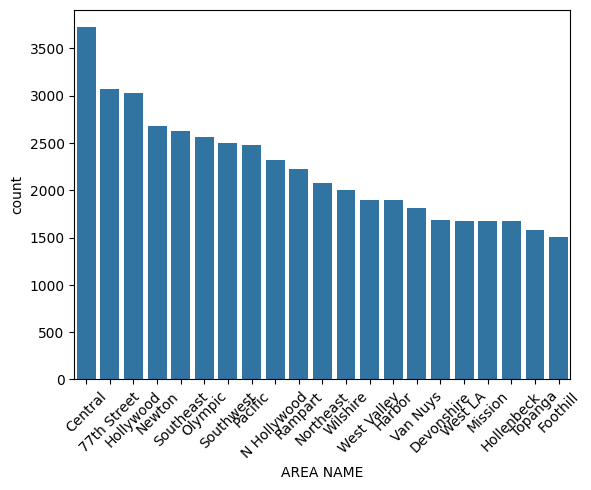

In [5]:
night_crimes = crimes[(crimes['TIME OCC'].astype(int)>2200) | (crimes['TIME OCC'].astype(int)<359)][['AREA NAME']]
night_area_crimes = night_crimes.value_counts()
night = pd.DataFrame(night_area_crimes)
sns.barplot(x='AREA NAME',y='count',data=night)
plt.xticks(rotation=45)  

WE CAN SEE THE PLACE "CENTRAL" HAS NIGHT CRIMES.

Number of crimes committed against victims of different age groups.

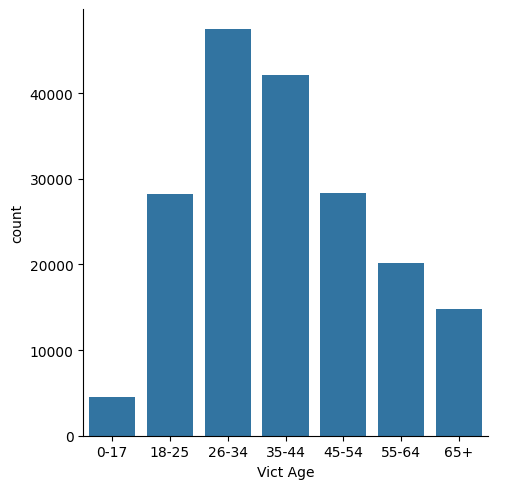

In [6]:
bins=[0,17,25,34,44,54,64,float('inf')]
labels=["0-17","18-25","26-34","35-44","45-54","55-64","65+"]

victim_ages = pd.cut(crimes['Vict Age'],labels=labels,bins=bins).value_counts().sort_index()

vict = pd.DataFrame(victim_ages)
sns.catplot(x='Vict Age', y='count',data=vict,kind='bar')

WE CAN SEE AGE GROUP FROM 26-34 AND 35-44 ARE AFFECTED MOST